## Gradient descent

#### 미분

> - 미분(differentiation)은 **변수의 움직임에 따른 함수값의 변화를 측정하기 위한 도구**로 최적화에서 제일 많이 사용하는 기법이다.
    - 미분은 변화율의 극한으로 정의한다.
    - $ f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} $
> - 최근에는 미분을 컴퓨터가 계산해줄 수 있다.
    - **`sympy.diff`**를 이용해 미분 계산 가능

In [100]:
import sympy as sym
from sympy.abc import x
import numpy as np
import matplotlib.pyplot as plt

sym.diff(sym.poly(x**2 + 2*x), x)

Poly(2*x + 2, x, domain='ZZ')

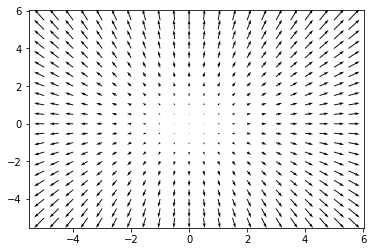

In [103]:
x, y = sym.symbols('x y') # symbol 설정
fun = x**2 + y**2 # func 설정

# 미분 함수 정의
gradfun = [sympy.diff(fun, var) for var in (x,y)] # 미분
numgradfun = sympy.lambdify([x, y], gradfun) # 미분 함수

X,Y = np.meshgrid(np.arange(-5,6, 0.5),np.arange(-5,6, 0.5)) # 범위 설정
graddat = numgradfun(X,Y) # gradient 계산

plt.figure()
plt.quiver(X,Y,graddat[0],graddat[1])
plt.show()

> - 미분은 함수 $f$의 주어진 점 $(x, f(x))$에서의 **접선의 기울기**를 구한다.
> - 미분을 계산하려면 함수의 모양이 연속해야 한다.
> - 한 점에서 접선의 기울기를 알면 어느 방향으로 점을 움직여야 함수값이 **증가, 감소**하는지 알 수 있다.
> - **미분값을 더하면 경사상승법(gradient ascent)**이라 하며 함수의 **극대값**의 위치를 구할 때 사용한다.
    - 목적함수를 **`최대화`**할 때 사용한다.
> - **미분값을 빼면 경사하강법(gradient descent)**이라 하며 함수의 **극소값**의 위치를 구할 때 사용한다.
    - 목적함수를 **`최소화`**할 때 사용한다.
    
> #### 변수가 벡터일 때
> - 벡터가 입력인 다변수 함수의 경우 **편미분(partial differentiation)**을 사용한다.
    - $ \partial_{x_i} f(\mathbf{x}) = \lim_{h \to 0} \frac{f(\mathbf{x} + h\mathbf{e}_i) - f(\mathbf{x})}{h} $
    - $ \mathbf{e}_i $는 $i$ 번째 값만 1이고 나머지는 0인 단위벡터
> - 각 변수 별로 편미분을 계산한 **그레디언트(gradient) 벡터**를 이용하여 경사 하강, 상승법에 사용할 수 있다.
    - $ \nabla f = (\partial_{x_1} f, \partial_{x_2} f, \cdots, \partial_{x_d} f) $

#### 경사하강법으로 선형회귀 계수 구하기

> - 선형회귀의 목적식은 $ \Vert \mathbf{y} - \mathbf{X}\beta \Vert $ 이고 이를 **최소화**하는 $ \beta $를 찾아야 한다.
> - $$ \partial_{\beta_k} \Vert \mathbf{y} - \mathbf{X}\beta \Vert$$
> - 위 수식을 $ \beta_k $로 미분하게 되면 다음과 같이 나온다.
> - $$ - \frac{\mathbf{X_k^T} (\mathbf{y} - \mathbf{X}\beta)}{n \Vert \mathbf{y} - \mathbf{X}\beta \Vert} $$
> - 목적식을 최고화하는 $ \beta $를 구하는 경사하강법 알고리즘은 다음과 같다.
> - $$ \beta^{t+1} \leftarrow \beta^{t} - \lambda\nabla_\beta \Vert \mathbf{y} - \mathbf{X}\beta^t \Vert$$

In [71]:
import numpy as np

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3 # y = X*[1,2] + 3

beta_gd = np.array([10.1, 10.1, -6.5]) # [1,2,3] 이 정답

# intercept 항 추가 / (4, 3)
X_ = np.array([np.append(x, [1]) for x in X]) 

for t in range(5000):
    # (4, ) = (4, ) - (4, 3) * (3, )
    error = y - X_ @ beta_gd
    
    # (3, ) = (3, 4) * (4, )
    grad = - np.transpose(X_) @ error
    beta_gd = beta_gd - 0.01 * grad
    
print(beta_gd)

[1.0000038  1.99999947 2.99999499]


#### 확률적 경사하강법

> - **확률적 경사하강법(stochastic gradient descent)**은 모든 데이터를 사용해서 업데이트 하는 대신 데이터 한 개 또는 일부 활용하여 업데이터한다.
> - 볼록이 아닌(non-convex) 목적식은 SGD를 통해 최적화할 수 있습니다.
    - SGD가 만능은 아니지만 딥러닝의 경우 **`SGD`가 `경사하강법`보다 실증적으로 더 낫다**고 검증되었다.
> - 데이터의 일부를 가지고 파라미터를 업데이트하기 때문에 연산자원을 좀 더 효율적으로 활용하는데 도움이 된다.
> - 볼록이 아닌 목적식에서도 사용 가능하므로 경사하강법보다 **머신러닝 학습에 더 효율적**이다.

In [107]:
def l2_norm(x):
    x_norm = x*x
    x_norm = np.sum(x_norm)
    x_norm = np.sqrt(x_norm)
    return x_norm

In [108]:
def angle(x, y):
    v = np.inner(x, y) / (l2_norm(x) * l2_norm(y))
    theta = np.arccos(v)
    return theta

x = np.array([0, 1])
y = np.array([0, 2])
print(angle(x, y))

0.0
